In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 8.84 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [54]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import heapq as hq

#Primero ingresamos los datos de entrada mediante un archivo

In [55]:
%%file 1.adjlist
1 2
2 3
3 4
4 2
5 4
6 5 7
7 6

Overwriting 1.adjlist


#Luego creamos un grafo dirigido con los datos de entrada del archivo

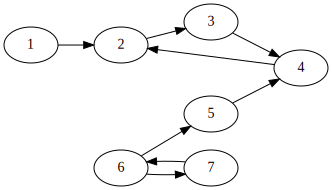

In [56]:
G = nx.read_adjlist('1.adjlist', create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G)

#Ahora queremos hallar la cantidad de grupos que se forma en este grafo es por eso que usamos el algoritmo de 'KOSARAJU' para hallar los componentes fuertemente conexos lo que en otras palabras sería "La cantidad de grupos que se formaría considerando que es posible formar grupos siempre y cuando cada estudiante esté de acuerdo en hacer grupo con alguien que no ha considerado directamente, siempre y cuando alguien más en el grupo, si lo haya considerado"

In [59]:
#Para empezar este algoritmo primero nos pide invertir las aristas es por eso que implementamos esta función "reverseGraph"
def reverseGraph(G):
  Gr = nx.DiGraph()
  for u, v in G.edges:
    Gr.add_edge(v, u)

  return Gr

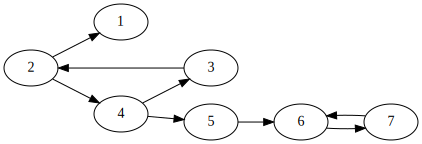

In [60]:
#Aqui solo estamos graficando el grafo con sus aristas invertidas
Gr = reverseGraph(G)
gs.nx2gv(Gr)

In [61]:
def kosaraju(G):
  #Ahora ya que tenemos ese grafo con las aristas invertidas procedemos primero a aplicar DFS para este grafo invertido
  #esa es la función de "dfs1"
  def dfs1(u):
    if not Gr.nodes[u]['visited']:
      Gr.nodes[u]['visited'] = True
      for v in Gr.neighbors(u):
        if not Gr.nodes[v]['visited']:
          dfs1(v)
      cont[0] += 1
      hq.heappush(f, (-cont[0], u))

  def dfs2(u):
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      cc.append(u)
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          dfs2(v)

  # Llamamos a la función que revierte las aristas del grafo
  Gr = reverseGraph(G)

  for u in Gr.nodes:
    Gr.nodes[u]['visited'] = False
  cont = [0]
  f = []
  # Obtenemos el orden de finalización para cada nodo
  for u in Gr.nodes:
    dfs1(u)


  # Por ultumo ejecutamos otro DFS("dfs2") para el grafo original(G)
  # pero procesando los nodos en orden de finalización decreciente
  for u in G.nodes:
    G.nodes[u]['visited'] = False
  scc = []
  while f:
    _, u = hq.heappop(f)
    cc = []
    dfs2(u)
    if cc:
      scc.append(cc)
#Finalmente retornamos los componentes fuertemente conexos
  return scc

In [64]:
# Aca como la variable "scc" no es global la estoy guardando en una variable local
# para poder trabajar con ella y bote el resultado que se requiere
scc = []
scc = kosaraju(G)

lenght = len(scc)

#Creamos dos listas para guardas los resultados que se requiere
singrupo = []
mayor = []
#Recorremos los indices de la lista
for i in range(lenght):
  #Guardamos en la lista "singrupo" los componentes fuertemente conexos que tengan un tamaño igual a 1
  if len(scc[i]) == 1:
    singrupo.append(scc[i])
  #Guardamos en la lista "mayor" el componente fuertemente conexo que tenga el mayor tamaño de todos
  if len(mayor) < len(scc[i]):
    mayor = scc[i]

print(len(singrupo))
print(len(mayor)) 

2
3
